# About

On this notebook we setup the last and complete steps for the pipeline.

In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# Definitions

REGION = "BigBuenosAiresCityCenter"

In [76]:
from tqdm import tqdm
tqdm.pandas()

import tools
import settings

settings.CONSTANTS.DEFAULT_CELL_SIZE_METERS = 10

In [77]:
subset = tools.load_subset(REGION)
subset

Subset BigBuenosAiresCityCenter loaded with 144850 entries.


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON((-58.3611720314689 -34.6299919688764, ...",48Q39JCQ+2GH2
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON((-58.3976940502514 -34.6211128950923, ...",48Q39JH2+HWJR
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON((-58.3726862870237 -34.6098345100679, ...",48Q39JRG+3WRP
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON((-58.412915413868 -34.615254819972, -5...",48Q39HMP+WR7H
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON((-58.4040213914141 -34.5800603862449, ...",48Q3CH9W+X9CM
...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON((-58.4254333145451 -34.6161750233704, ...",48Q39HMF+HR78
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON((-58.397069288131 -34.6328010879109, -...",48Q39J83+V4QW
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON((-58.3987373989918 -34.6314794744601, ...",48Q39J92+CF9V
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON((-58.3871466246279 -34.6082398692629, ...",48Q39JR7+P483


In [78]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((-58.36117 -34.62999, -58.3611 -34.62...",48Q39JCQ+2GH2
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((-58.39769 -34.62111, -58.39771 -34.6...",48Q39JH2+HWJR
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((-58.41292 -34.61525, -58.41292 -34.6...",48Q39HMP+WR7H
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((-58.40402 -34.58006, -58.40411 -34.5...",48Q3CH9W+X9CM
...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((-58.42543 -34.61618, -58.42544 -34.6...",48Q39HMF+HR78
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((-58.39707 -34.6328, -58.39709 -34.63...",48Q39J83+V4QW
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((-58.39874 -34.63148, -58.39877 -34.6...",48Q39J92+CF9V
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((-58.38715 -34.60824, -58.38715 -34.6...",48Q39JR7+P483


<Axes: >

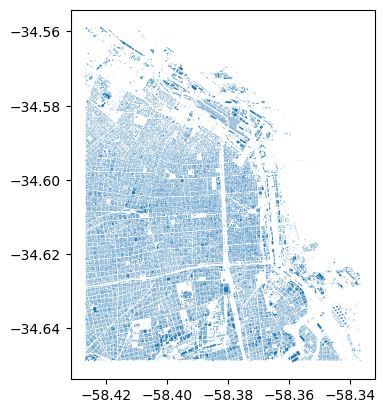

In [79]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [80]:
long_area_center, lat_area_center = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.393739786036924, -34.61578900154504


<Axes: >

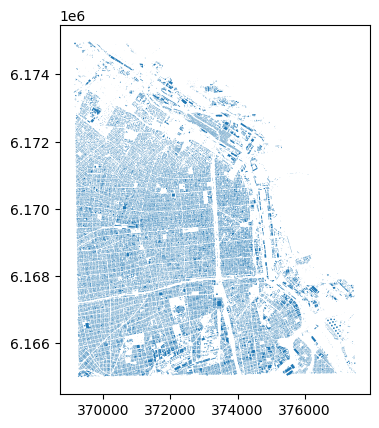

In [81]:
# Now we convert the representation system to UTM
subset = tools.convert_to_UTM(subset)
subset.plot()

In [82]:
area_center_x, area_center_y = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.393739786036924, -34.61578900154504


In [83]:
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((375230.082 6167145.849, 375236.869 6...",48Q39JCQ+2GH2,375232.065668,6.167151e+06
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((371868.457 6168084.734, 371866.509 6...",48Q39JH2+HWJR,371863.331148,6.168094e+06
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((370463.857 6168714.951, 370463.013 6...",48Q39HMP+WR7H,370461.401589,6.168719e+06
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((371225.001 6172629.431, 371216.436 6...",48Q3CH9W+X9CM,371216.885961,6.172630e+06
...,...,...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((369317.573 6168596.747, 369317.06 61...",48Q39HMF+HR78,369315.652569,6.168606e+06
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((371943.698 6166789.293, 371941.433 6...",48Q39J83+V4QW,371937.635681,6.166792e+06
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((371788.753 6166933.741, 371785.858 6...",48Q39J92+CF9V,371785.543521,6.166937e+06
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((372815.806 6169525.717, 372815.696 6...",48Q39JR7+P483,372813.128930,6.169528e+06


In [84]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y,relative_x,relative_y,x_cell,y_cell,size_in_cells
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((375230.082 6167145.849, 375236.869 6...",48Q39JCQ+2GH2,375232.065668,6.167151e+06,3009.465183,-1529.718536,300,-153,1
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((371868.457 6168084.734, 371866.509 6...",48Q39JH2+HWJR,371863.331148,6.168094e+06,-359.269337,-586.328453,-36,-59,2
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06,1917.187601,695.052482,191,69,1
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((370463.857 6168714.951, 370463.013 6...",48Q39HMP+WR7H,370461.401589,6.168719e+06,-1761.198896,38.809701,-177,3,1
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((371225.001 6172629.431, 371216.436 6...",48Q3CH9W+X9CM,371216.885961,6.172630e+06,-1005.714524,3949.082095,-101,394,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((369317.573 6168596.747, 369317.06 61...",48Q39HMF+HR78,369315.652569,6.168606e+06,-2906.947916,-74.413141,-291,-8,1
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((371943.698 6166789.293, 371941.433 6...",48Q39J83+V4QW,371937.635681,6.166792e+06,-284.964804,-1888.467862,-29,-189,1
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((371788.753 6166933.741, 371785.858 6...",48Q39J92+CF9V,371785.543521,6.166937e+06,-437.056964,-1743.851003,-44,-175,1
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((372815.806 6169525.717, 372815.696 6...",48Q39JR7+P483,372813.128930,6.169528e+06,590.528445,847.019865,59,84,1


In [85]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

100%|██████████| 836/836 [00:52<00:00, 15.94it/s]


In [86]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 144850/144850 [01:21<00:00, 1781.30it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y,relative_x,relative_y,x_cell,y_cell,size_in_cells,overlapping
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((375230.082 6167145.849, 375236.869 6...",48Q39JCQ+2GH2,375232.065668,6.167151e+06,3009.465183,-1529.718536,300,-153,1,"[{'x_cell': 300, 'y_cell': -154, 'area': 15.95..."
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((371868.457 6168084.734, 371866.509 6...",48Q39JH2+HWJR,371863.331148,6.168094e+06,-359.269337,-586.328453,-36,-59,2,"[{'x_cell': -37, 'y_cell': -60, 'area': 18.099..."
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06,1917.187601,695.052482,191,69,1,"[{'x_cell': 191, 'y_cell': 68, 'area': 24.0117..."
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((370463.857 6168714.951, 370463.013 6...",48Q39HMP+WR7H,370461.401589,6.168719e+06,-1761.198896,38.809701,-177,3,1,"[{'x_cell': -177, 'y_cell': 3, 'area': 18.0681..."
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((371225.001 6172629.431, 371216.436 6...",48Q3CH9W+X9CM,371216.885961,6.172630e+06,-1005.714524,3949.082095,-101,394,1,"[{'x_cell': -102, 'y_cell': 394, 'area': 9.603..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((369317.573 6168596.747, 369317.06 61...",48Q39HMF+HR78,369315.652569,6.168606e+06,-2906.947916,-74.413141,-291,-8,1,"[{'x_cell': -292, 'y_cell': -8, 'area': 2.5543..."
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((371943.698 6166789.293, 371941.433 6...",48Q39J83+V4QW,371937.635681,6.166792e+06,-284.964804,-1888.467862,-29,-189,1,"[{'x_cell': -30, 'y_cell': -189, 'area': 2.075..."
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((371788.753 6166933.741, 371785.858 6...",48Q39J92+CF9V,371785.543521,6.166937e+06,-437.056964,-1743.851003,-44,-175,1,"[{'x_cell': -45, 'y_cell': -175, 'area': 0.104..."
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((372815.806 6169525.717, 372815.696 6...",48Q39JR7+P483,372813.128930,6.169528e+06,590.528445,847.019865,59,84,1,"[{'x_cell': 58, 'y_cell': 84, 'area': 8.087387..."


In [87]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [88]:
# Now we will add the orientation information for each building
subset = tools.add_building_orientation(subset)
subset

100%|██████████| 144850/144850 [00:20<00:00, 6990.29it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y,relative_x,relative_y,x_cell,y_cell,size_in_cells,overlapping,orientation_angle,eccentricity
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((375230.082 6167145.849, 375236.869 6...",48Q39JCQ+2GH2,375232.065668,6.167151e+06,3009.465183,-1529.718536,300,-153,1,"[{'x_cell': 300, 'y_cell': -154, 'area': 15.95...",47.391270,0.924121
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((371868.457 6168084.734, 371866.509 6...",48Q39JH2+HWJR,371863.331148,6.168094e+06,-359.269337,-586.328453,-36,-59,2,"[{'x_cell': -37, 'y_cell': -60, 'area': 18.099...",95.617936,0.907815
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06,1917.187601,695.052482,191,69,1,"[{'x_cell': 191, 'y_cell': 68, 'area': 24.0117...",93.036766,0.897334
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((370463.857 6168714.951, 370463.013 6...",48Q39HMP+WR7H,370461.401589,6.168719e+06,-1761.198896,38.809701,-177,3,1,"[{'x_cell': -177, 'y_cell': 3, 'area': 18.0681...",95.241338,0.896806
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((371225.001 6172629.431, 371216.436 6...",48Q3CH9W+X9CM,371216.885961,6.172630e+06,-1005.714524,3949.082095,-101,394,1,"[{'x_cell': -102, 'y_cell': 394, 'area': 9.603...",135.892609,0.385682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((369317.573 6168596.747, 369317.06 61...",48Q39HMF+HR78,369315.652569,6.168606e+06,-2906.947916,-74.413141,-291,-8,1,"[{'x_cell': -292, 'y_cell': -8, 'area': 2.5543...",94.253958,0.897494
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((371943.698 6166789.293, 371941.433 6...",48Q39J83+V4QW,371937.635681,6.166792e+06,-284.964804,-1888.467862,-29,-189,1,"[{'x_cell': -30, 'y_cell': -189, 'area': 2.075...",15.301905,0.543013
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((371788.753 6166933.741, 371785.858 6...",48Q39J92+CF9V,371785.543521,6.166937e+06,-437.056964,-1743.851003,-44,-175,1,"[{'x_cell': -45, 'y_cell': -175, 'area': 0.104...",111.590483,0.876195
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((372815.806 6169525.717, 372815.696 6...",48Q39JR7+P483,372813.128930,6.169528e+06,590.528445,847.019865,59,84,1,"[{'x_cell': 58, 'y_cell': 84, 'area': 8.087387...",1.635133,0.676816


In [89]:
intersections = tools.build_intersections_df(subset)
intersections

,x_cell,y_cell,area,polygon_tag,fraction_of_the_building,fraction_of_buildings_in_cell
0,300,-154,15.954790,48Q39JCQ+2GH2,0.415460,0.419638
1,300,-153,6.272991,48Q39JCQ+2GH2,0.163348,1.000000
2,301,-154,1.776133,48Q39JCQ+2GH2,0.046250,1.000000
3,301,-153,14.398808,48Q39JCQ+2GH2,0.374942,0.720644
4,-37,-60,18.099793,48Q39JH2+HWJR,0.109077,0.267791
...,...,...,...,...,...,...
662641,59,84,12.172937,48Q39JR7+P483,0.600826,0.654779
662642,186,300,20.512249,48Q3CJ6G+CRXJ,0.411970,0.348221
662643,186,301,5.862638,48Q3CJ6G+CRXJ,0.117746,0.065638
662644,187,300,5.277009,48Q3CJ6G+CRXJ,0.105984,0.107784


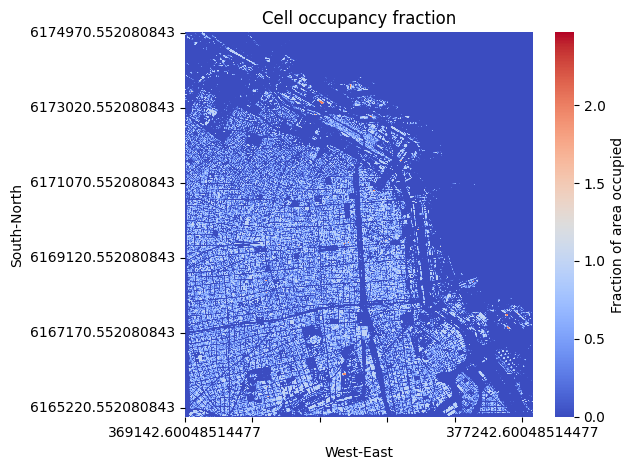

In [90]:
tools.plot_occupied_area_heatmap(intersections, area_center_x=area_center_x, area_center_y=area_center_y, save_as="test.png")

In [ ]:
cell_composition = tools.build_cell_composition(intersections)
cell_composition

In [ ]:
cell_composition.iloc[20].values 

array([list([{'polygon_tag': '48Q3CJ25+XQHF', 'fraction_of_buildings_in_cell': 0.08892290184041948, 'fraction_of_the_building': 0.013461887817389977, 'area': 1.3560726892998543}, {'polygon_tag': '48Q3CJ25+WQGG', 'fraction_of_buildings_in_cell': 0.9110770981595806, 'fraction_of_the_building': 0.18823784821218073, 'area': 13.893909725055611}])],
      dtype=object)

In [ ]:
cell_composition = tools.add_orientation_to_cells(cell_composition, subset)
cell_composition

100%|██████████| 24723/24723 [00:40<00:00, 615.28it/s]


cell_composition  \
x_cell y_cell                                                      
-83     9      [{'polygon_tag': '48Q39JW5+RRRW', 'fraction_of...   
        10     [{'polygon_tag': '48Q39JW5+RRRW', 'fraction_of...   
        34     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...   
        35     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...   
        36     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...   
...                                                          ...   
 84    -10     [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...   
       -9      [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...   
       -8      [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...   
       -7      [{'polygon_tag': '48Q39JWG+5WM3', 'fraction_of...   
       -6      [{'polygon_tag': '48Q39JWG+5WM3', 'fraction_of...   

               orientation_angle  eccentricity  
x_cell y_cell                                   
-83     9               5.046740      0.542407  
        10              5.046740      0.542407  
        34             88.895136      0.939630  
        35             88.895136      0.939630  
        36             88.895136      0.939630  
...                          ...           ...  
 84    -10              9.755924      0.202537  
       -9               9.755924      0.202537  
       -8               4.981812      0.535338  
       -7               4.981546      0.535428  
       -6               4.981546      0.535428  

[24723 rows x 3 columns]

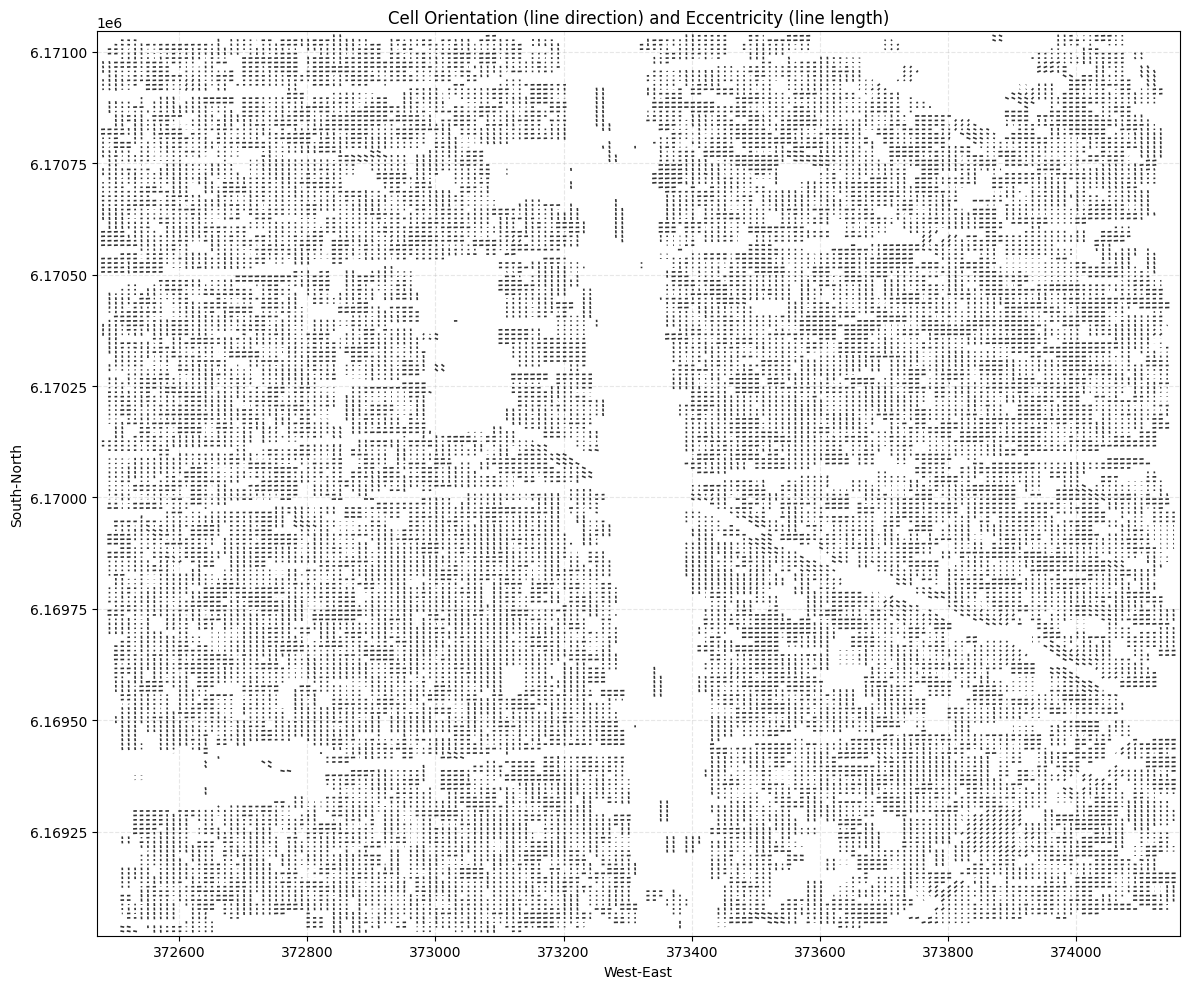

In [ ]:
tools.plot_orientation_lines(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y, save_as="test_orientation.png")